<a href="https://colab.research.google.com/github/RajSalvi738/COVID_19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Its 25th March Afternoon and India has reported its 9th death with 562 total confirmed cases due to COVID-19. Fresh cases from Manipur, Bihar, Gujrat, and Madhya Pradhesh have been reported by the Union Ministry of Health and Family Welfare.

As the coronavirus outbreak continues to spread in the country, the question that we as Indians are trying to answer is :

"Will India be able to tackle this pandemic or are we going to witness another Italy/ S.Korea/ Wuhan?"

Goal:
We need a strong model that predicts how the virus could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the virus in the next 7 days.

Tasks to be performed:
1. Analysing the present condition in India
2. Is this trend similar to Italy/S. Korea/ Wuhan
3. Exploring the world wide data
4. Forecasting the world wide COVID-19 cases using Prophet

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize'] = 10, 12

import warnings
warnings.filterwarnings('ignore')

# Part 1: Analysing the present condition in India

In [4]:
df = pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [0]:
# India_coordinates = pd.read_excel('Indian Coordinates.xlsx')

#Daily Data of India, Korea, Italy, Wuhan
daily_India = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='India')
daily_Italy = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Italy')
daily_Wuhan = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Wuhan')
daily_Korea = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Korea')

In [6]:
df.drop(['S. No.'], axis=1, inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total no. of confirmed COVID-19 cases across India till date (22nd March, 2020): ', total_cases)

Total no. of confirmed COVID-19 cases across India till date (22nd March, 2020):  562


In [7]:
df.style.background_gradient(cmap = 'Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [8]:
df['Total Currently Hospitalized'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_currently_hospitalized = df['Total Currently Hospitalized'].sum()
print(f'Total number of COVID-19 cases which are active across India: {total_currently_hospitalized}')
total_cases_per_state = df.groupby('Name of State / UT')['Total Currently Hospitalized'].sum().sort_values(ascending=False).to_frame()
total_cases_per_state.style.background_gradient(cmap='Reds')

Total number of COVID-19 cases which are active across India: 512


,Total Currently Hospitalized
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_India['Date'], y=daily_India['Total Cases'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text = 'Trend of Coronavirus in India (Cumulative Cases)', plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [10]:
fig = px.bar(daily_India, x='Date', y='New Cases', barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis', plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Part 2: Is the trend similar to Italy/Wuhan/South Korea

In [11]:
fig = px.bar(daily_India, x='Date', y='Total Cases', color='Total Cases', orientation='v', height=600,
            title='Confirmed Cases in India', color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(daily_Italy, x='Date', y='Total Cases', color='Total Cases', orientation='v', height=600,
            title='Confirmed Cases in Italy', color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(daily_Wuhan, x='Date', y='Total Cases', color='Total Cases', orientation='v', height=600,
            title='Confirmed Cases in Wuhan', color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(daily_Korea, x='Date', y='Total Cases', color='Total Cases', orientation='v', height=600,
            title='Confirmed Cases in Korea', color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [12]:
#After 100 cases

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122, 128, 0)', 'rgb(255, 0, 0)', 'rgb(49, 130, 189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()

fig.add_trace(go.Scatter(x=daily_Korea['Days after surpassing 100 cases'],
                         y=daily_Korea['Total Cases'], mode='lines', 
                         name=labels[0],
                         line=dict(color=colors[0], width=line_size[0]),
                         connectgaps=True))

fig.add_trace(go.Scatter(x=daily_Italy['Days after surpassing 100 cases'],
                         y=daily_Italy['Total Cases'], mode='lines', 
                         name=labels[1],
                         line=dict(color=colors[1], width=line_size[1]),
                         connectgaps=True))

fig.add_trace(go.Scatter(x=daily_India['Days after surpassing 100 cases'],
                         y=daily_India['Total Cases'], mode='lines', 
                         name=labels[2],
                         line=dict(color=colors[2], width=line_size[2]),
                         connectgaps=True))


annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

# Part 3: Exploring World Wide Data

In [0]:
df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
df.rename(columns={'ObservationDate': 'Date', 'Country/Region': 'Country'}, inplace=True)

df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns={'Country/Region': 'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region': 'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [14]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [16]:
df_groupby_country = df.groupby(['Date', 'Country', 'Province/State'])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df_groupby_country.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [17]:
df.query('Country == "India"').groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [18]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

# Part 4: Forecasting Total Number of Cases Worldwide

In [0]:
from fbprophet import Prophet

In [22]:
confirmed.columns = ['ds', 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


# Base Model for Confirmed Cases Worldwide

In [23]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)

future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [24]:
#predicting future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,334262.899433,376242.612064
65,2020-03-27,372235.326938,352938.903164,393577.037315
66,2020-03-28,388674.964143,369561.035715,409616.962129
67,2020-03-29,405307.954675,383366.495312,425656.839769
68,2020-03-30,418529.648466,396365.014822,440232.874197


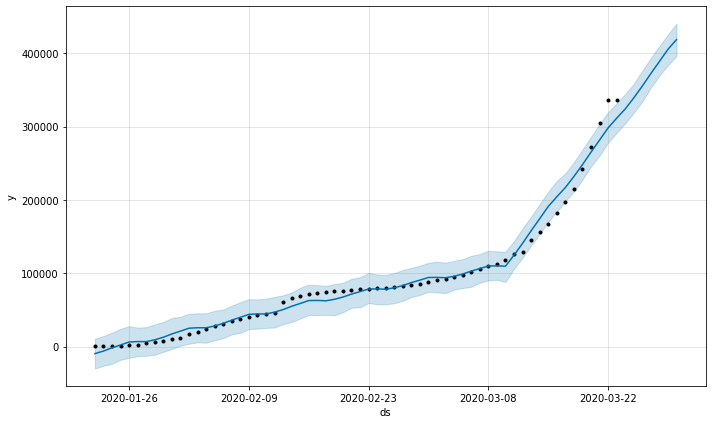

In [25]:
confirmed_forecast_plot = m.plot(forecast)

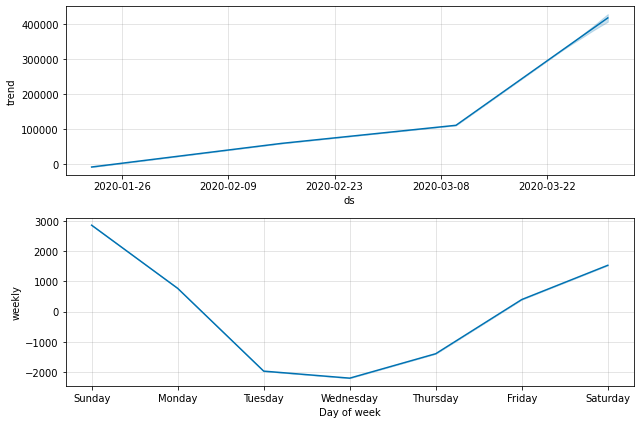

In [26]:
confirmed_forecast_plot = m.plot_components(forecast)

# Base Model for Deaths Worldwide

In [0]:
deaths.columns = ['ds', 'y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [29]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14514.527957,16338.408675
65,2020-03-27,16199.617603,15223.158820,17184.390026
66,2020-03-28,17006.904589,16124.514889,18041.698381
67,2020-03-29,17831.505383,16853.957887,18799.768949
68,2020-03-30,18490.986176,17440.197177,19457.334655


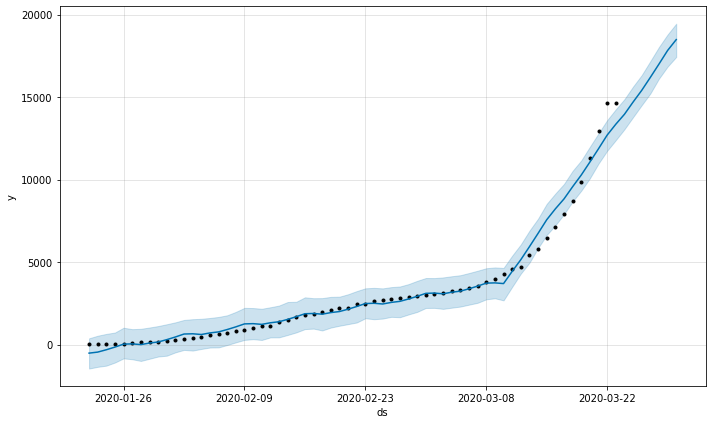

In [32]:
deaths_forecast_plot = m.plot(forecast)

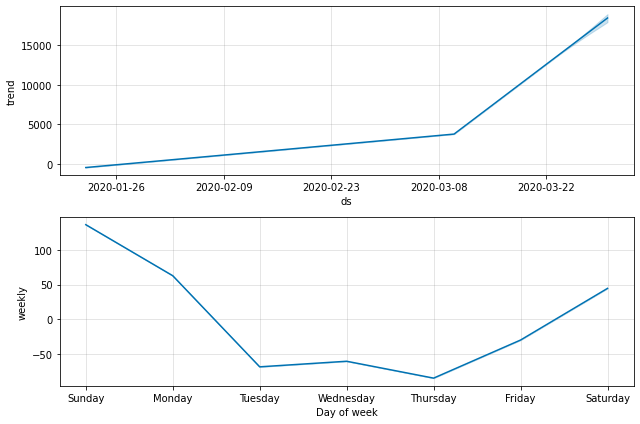

In [33]:
deaths_forecast_plot = m.plot_components(forecast)

# Base Model for Recovered Cases Worldwide

In [0]:
recovered.columns = ['ds', 'y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [35]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101175.174588,104864.187723
65,2020-03-27,105338.025042,103624.578656,107176.138695
66,2020-03-28,108256.310813,106157.799545,110434.035179
67,2020-03-29,111119.296170,108626.578458,113368.748252
68,2020-03-30,113244.961749,110590.579763,116524.336199


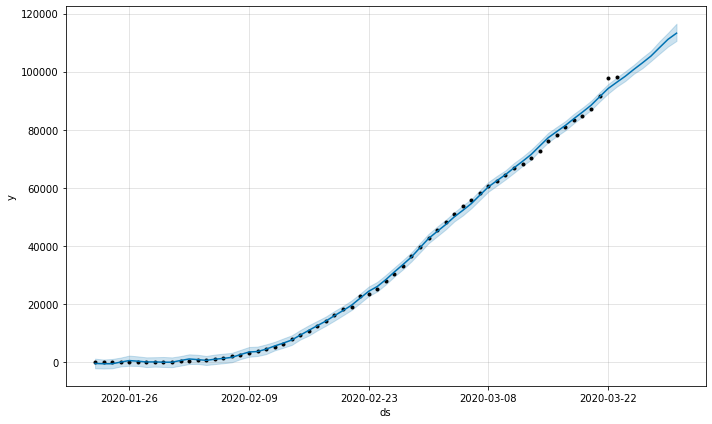

In [37]:
recovered_forecast_plot = m.plot(forecast)

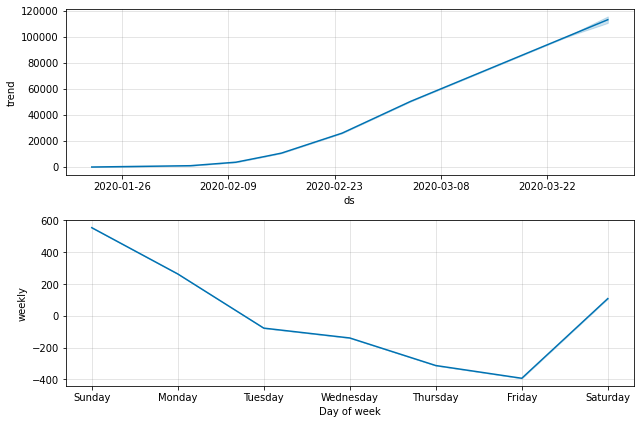

In [38]:
recovered_forecast_plot = m.plot_components(forecast)

#**Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset